In [159]:
#Import the required packages
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [160]:
img1=cv.imread("image12.jpg")

img2=cv.imread("Image 9.jpg",cv.IMREAD_GRAYSCALE)

img2 = np.float32(img2)

img2.shape

plt.imshow(img2)

In [161]:
# Convert to grayscale
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# Apply median filter
gray = cv.medianBlur(gray, 5)


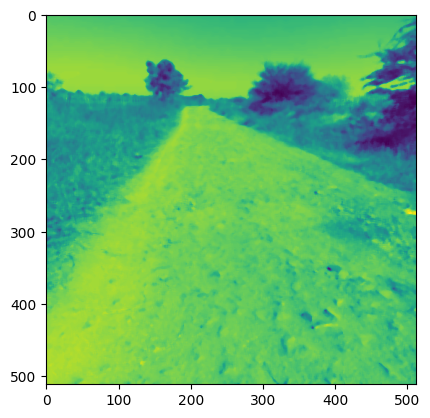

In [162]:
plt.imshow(gray)

In [163]:
# Perform spatial fuzzy clustering
num_clusters = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
flags = cv.KMEANS_PP_CENTERS
image2 = np.float32(gray.reshape((-1, 1)))
ret, label, center = cv.kmeans(image2, num_clusters, None, criteria, 10, flags)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((gray.shape))

In [164]:
# Apply Otsu's method to determine threshold value
ret2,thresh = cv.threshold(res2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [165]:
# Remove small clusters
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

In [166]:
# Fill in gaps
kernel = np.ones((15,15),np.uint8)
closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 3)

In [167]:
# Show output
cv.imshow('Input Image', img1)
cv.imshow('Unpaved Road Detection', closing)
cv.waitKey(0)
cv.destroyAllWindows()